In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import glm_model as gm
from glm_utils import *
import tensorflow as tf

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle

pkl_file = open('./boc/formatted/runspeed')
run_speed = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./boc/formatted/LMcelldata')
data = pickle.load(pkl_file)
pkl_file.close()

(array([   25.,  4688.,   338.,   294.,   251.,   182.,    93.,    53.,
           18.,     8.]),
 array([ -9.80095073,  -2.23495472,   5.33104128,  12.89703729,
         20.46303329,  28.0290293 ,  35.59502531,  43.16102131,
         50.72701732,  58.29301333,  65.85900933]),
 <a list of 10 Patch objects>)

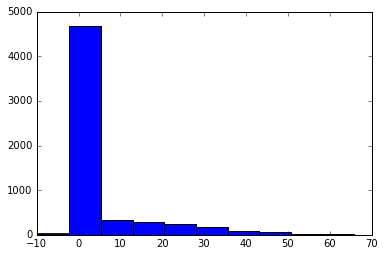

In [4]:
plt.hist(run_speed)

In [77]:
bins = np.linspace(0, 70, num = 20)
bin_hist = np.zeros([19, 2])
neural_responses = {k: np.zeros([19,2]) for k in data.keys()}

for i, b in enumerate(bins):
    if i> 0:
        bin_hist[i- 1] = [bins[i -1], bins[i]]
        
        for k in data.keys():
            
            temp = np.array(data[k])
            idx = np.where((run_speed > bins[i-1]) & (run_speed < bins[i]))
            av = np.mean(temp[idx[0]])
            std = np.std(temp[idx[0]])
            
            neural_responses[k][i-1, 0] = av
            neural_responses[k][i-1, 1] = std / np.sqrt(len(temp[idx[0]]))


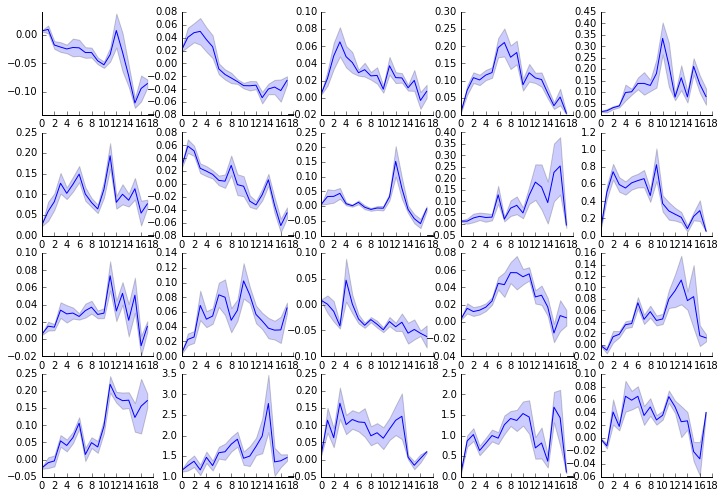

In [78]:
num_rows, num_cols = 4, 5

fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.0)

ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
gs.update(hspace=0)
gs.tight_layout(fig, h_pad=0,w_pad=0)


for i, k in enumerate(data.keys()):
    x = range(0, len(neural_responses[k][:, 0]))
    ax[i].plot(x, neural_responses[k][:, 0])
    ax[i].fill_between(x, neural_responses[k][:, 0] - neural_responses[k][:, 1],neural_responses[k][:, 0] + neural_responses[k][:, 1], alpha = .2)
    simpleaxis(ax[i])
    
    if i == 19:
        break;
plt.show()

In [65]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split


r2r= []
for k in data.keys():
    
    X_train, X_test, y_train, y_test = train_test_split(np.array(run_speed), np.array(data[k]))
    
    model = Lasso(alpha = 0, fit_intercept= True)
    model.fit(X_train[:, np.newaxis], y_train[:, np.newaxis])
    r2 = model.score(X_test[:, np.newaxis], y_test[:, np.newaxis])
    r2r.append(r2)
    

/Users/ameliachristensen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


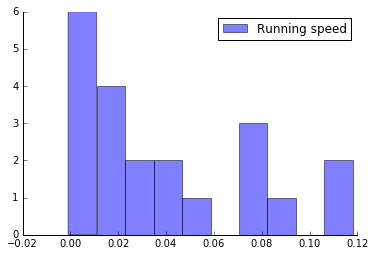

In [70]:

ax = plt.subplot(111)
plt.hist(r2r, alpha = .5, label = "Running speed")
plt.legend(loc='upper right')
simpleaxis(ax)

In [48]:
y_train.shape

(4462,)

In [49]:
X_test.shape

(1488,)

In [50]:
y_test.shape

(1488,)